In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tqdm import tqdm

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input
from tensorflow.keras.models import Model

from tensorflow.keras.datasets.mnist import load_data

In [4]:
(x_train, y_train), (x_test, y_test)  = load_data()

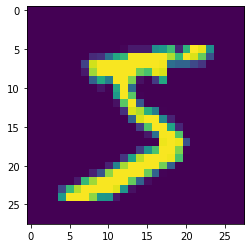

In [5]:
plt.imshow(x_train[0])

In [6]:
height = x_train.shape[1]
old_width = x_train.shape[2]
width = 128

(5, 79)


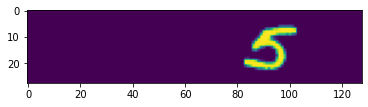

In [7]:
def create_img(x_array, y_array):
    new_img = np.zeros([height, width])
    shift = random.randint(0, width-old_width)
    idx = random.randint(0, x_array.shape[0]-1)
    y = y_array[idx]
    new_img[:, shift: shift + old_width] = x_array[idx]
    return new_img, (y, shift)

_=create_img(x_train, y_train)
plt.imshow(_[0])
print(_[1])

In [8]:
imgs = []
nums = []
shifts = []
for _ in tqdm(range(50000)):
    img, (num, shift) = create_img(x_train, y_train)
    imgs.append(img.reshape(height, width, 1))
    nums.append(num)
    shifts.append(shift)

100%|██████████| 50000/50000 [00:01<00:00, 31290.93it/s]


In [12]:
inp = Input([28,128,1])

x = Conv2D(4, kernel_size=(3,3), padding="same", activation="relu")(inp)
x = MaxPool2D()(x)

x = Conv2D(8, kernel_size=(3,3), padding="same", activation="relu")(x)
x = Flatten()(x)

x = Dense(128, activation="relu")(x)
clfs = Dense(10, activation="softmax", name="clfs")(x)
reg = Dense(1, activation="linear", name="reg")(x)

model = Model(inputs=inp, outputs=[clfs, reg])

In [13]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 128, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 28, 128, 4)   40          input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 14, 64, 4)    0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 64, 8)    296         max_pooling2d[0][0]              
______________________________________________________________________________________________

In [14]:
model.compile(loss=[tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), "MSE"],
             optimizer="adam",
             metrics=["accuracy", "mae"])

In [58]:
model.fit(imgs, nums, epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 65s 166ms/step - loss: 1.5009 - clfs_loss: 0.1783 - reg_loss: 1.3226 - clfs_accuracy: 0.9488 - clfs_mae: 4.3766 - reg_accuracy: 0.1563 - reg_mae: 0.8324
Epoch 2/10
391/391 [==============================] - 65s 167ms/step - loss: 1.3163 - clfs_loss: 0.1457 - reg_loss: 1.1706 - clfs_accuracy: 0.9574 - clfs_mae: 4.3766 - reg_accuracy: 0.1586 - reg_mae: 0.7787
Epoch 3/10
391/391 [==============================] - 64s 165ms/step - loss: 1.1809 - clfs_loss: 0.1206 - reg_loss: 1.0604 - clfs_accuracy: 0.9649 - clfs_mae: 4.3766 - reg_accuracy: 0.1598 - reg_mae: 0.7417
Epoch 4/10
391/391 [==============================] - 65s 165ms/step - loss: 1.0485 - clfs_loss: 0.0985 - reg_loss: 0.9500 - clfs_accuracy: 0.9719 - clfs_mae: 4.3766 - reg_accuracy: 0.1609 - reg_mae: 0.7045
Epoch 5/10
391/391 [==============================] - 65s 166ms/step - loss: 0.9427 - clfs_loss: 0.0827 - reg_loss: 0.8600 - clfs_accuracy: 0.9774 - clfs_mae: 4.3766 - reg_

In [30]:
def make_sample(imgs, nums, shifts):
  idx = random.randint(0, nums.shape[0]-1)
  print('nums:', nums[idx])
  print('shifts:', shifts[idx])
  plt.imshow(imgs[idx].reshape(28,128))
  return imgs[idx].reshape(1,28,128)

nums: [7]
shifts: [61]


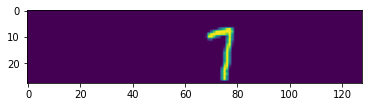

In [65]:
c = make_sample(imgs, nums, shifts)

In [66]:
model.predict(c)

[array([[3.7355358e-07, 1.9422778e-05, 3.3381659e-07, 1.5298206e-04,
         1.1188361e-08, 3.2126747e-05, 1.6856832e-11, 9.9173146e-01,
         3.6660065e-05, 8.0266763e-03]], dtype=float32),
 array([[6.879027]], dtype=float32)]

In [68]:
model.fit(imgs, (nums, shifts), epochs=10, batch_size=128)

Epoch 1/10
391/391 [==============================] - 65s 166ms/step - loss: 2.2540 - clfs_loss: 0.2297 - reg_loss: 2.0243 - clfs_accuracy: 0.9279 - clfs_mae: 4.3766 - reg_accuracy: 0.0153 - reg_mae: 0.9668
Epoch 2/10
391/391 [==============================] - 65s 166ms/step - loss: 1.5388 - clfs_loss: 0.2043 - reg_loss: 1.3345 - clfs_accuracy: 0.9367 - clfs_mae: 4.3766 - reg_accuracy: 0.0162 - reg_mae: 0.7941
Epoch 3/10
391/391 [==============================] - 65s 165ms/step - loss: 1.1715 - clfs_loss: 0.1873 - reg_loss: 0.9842 - clfs_accuracy: 0.9430 - clfs_mae: 4.3766 - reg_accuracy: 0.0167 - reg_mae: 0.6930
Epoch 4/10
391/391 [==============================] - 67s 170ms/step - loss: 0.9286 - clfs_loss: 0.1719 - reg_loss: 0.7567 - clfs_accuracy: 0.9466 - clfs_mae: 4.3766 - reg_accuracy: 0.0167 - reg_mae: 0.6164
Epoch 5/10
391/391 [==============================] - 65s 167ms/step - loss: 0.7924 - clfs_loss: 0.1609 - reg_loss: 0.6314 - clfs_accuracy: 0.9504 - clfs_mae: 4.3766 - reg_

nums: [4]
shifts: [13]


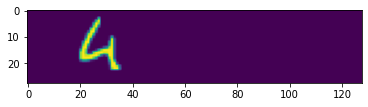

In [82]:
d = make_sample(imgs, nums, shifts)

In [83]:
model.predict(d)

[array([[6.0137959e-06, 5.8043806e-04, 1.7544051e-03, 5.8857358e-06,
         9.1116047e-01, 1.0619872e-04, 8.2138360e-02, 1.1973528e-04,
         1.2765710e-05, 4.1157692e-03]], dtype=float32),
 array([[13.03565]], dtype=float32)]

In [101]:
def make_data(x_array, y_array, scope):
  imgs = []
  nums = []
  shifts = []
  for _ in tqdm(range(scope)):
    img, (num, shift) = create_img(x_array, y_array)
    imgs.append(img.reshape(height, width, 1))
    nums.append(num)
    shifts.append(shift)
  imgs = np.array(imgs)
  shifts = np.array(shifts).reshape(-1,1)
  nums = np.array(nums).reshape(-1,1)
  imgs = imgs/255
  return imgs, nums, shifts

In [109]:
x_test, y_test1, y_test2 = make_data(x_train, y_train, 100)

100%|██████████| 100/100 [00:00<00:00, 27474.81it/s]


nums: [1]
shifts: [89]


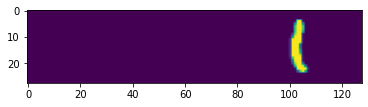

In [110]:
f = make_sample(x_test, y_test1, y_test2)

In [111]:
model.predict(f)

[array([[3.7946634e-07, 9.9828315e-01, 8.2671463e-08, 1.9441679e-06,
         1.3609413e-03, 2.0680742e-08, 3.5327461e-04, 2.6946958e-08,
         1.7444926e-07, 8.8048310e-08]], dtype=float32),
 array([[88.794785]], dtype=float32)]